In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
# read in the data
imdb_df = pd.read_csv('top_gross_films.csv')

# name the dataframe columns
imdb_df.columns = ['rank', 'title', 'world_lifetime_gross', 'domestic_lifetime_gross', \
                   'international_lifetime_gross', 'studio', 'domestic_opening_gross', 'budget', \
                   'release_date', 'MPAA_rating', 'run_time', 'genre_list', 'lead_name', 'lead_birth_date', \
                   'lead_height_m', 'lead_is_female', 'audience_score', 'tomatometer']

In [3]:
imdb_df.head()

,rank,title,world_lifetime_gross,domestic_lifetime_gross,international_lifetime_gross,studio,domestic_opening_gross,budget,release_date,MPAA_rating,run_time,genre_list,lead_name,lead_birth_date,lead_height_m,lead_is_female,audience_score,tomatometer
0,1,Avatar,2847246203,760507625.0,2086738578,Twentieth Century Fox,77025481.0,237000000.0,2009-12-16,PG-13,162.0,Action Adventure Fantasy Sci-Fi,Sam Worthington,1976-08-02,1.78,False,82.0,82.0
1,2,Avengers: Endgame,2797501328,858373000.0,1939128328,Walt Disney Studios Motion Pictures,357115007.0,356000000.0,2019-04-24,PG-13,181.0,Action Adventure Drama Sci-Fi,Robert Downey Jr.,1965-04-04,1.74,False,90.0,94.0
2,3,Titanic,2201647264,659363944.0,1542283320,Paramount Pictures,28638131.0,200000000.0,1997-12-19,PG-13,194.0,Drama Romance,Leonardo DiCaprio,1974-11-11,1.83,False,69.0,89.0
3,4,Star Wars: Episode VII - The Force Awakens,2069521700,936662225.0,1132859475,Walt Disney Studios Motion Pictures,247966675.0,245000000.0,2015-12-16,PG-13,138.0,Action Adventure Sci-Fi,Daisy Ridley,1992-04-10,1.70,True,85.0,93.0
4,5,Avengers: Infinity War,2048359754,678815482.0,1369544272,Walt Disney Studios Motion Pictures,257698183.0,NaN,2018-04-25,PG-13,149.0,Action Adventure Sci-Fi,Robert Downey Jr.,1965-04-04,1.74,False,91.0,85.0


In [4]:
# budget has many nan values, this will likely limit the size of the cleaned data set
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rank                          6000 non-null   int64  
 1   title                         6000 non-null   object 
 2   world_lifetime_gross          6000 non-null   int64  
 3   domestic_lifetime_gross       5023 non-null   float64
 4   international_lifetime_gross  6000 non-null   int64  
 5   studio                        4934 non-null   object 
 6   domestic_opening_gross        4723 non-null   float64
 7   budget                        2633 non-null   float64
 8   release_date                  6000 non-null   object 
 9   MPAA_rating                   3873 non-null   object 
 10  run_time                      5800 non-null   float64
 11  genre_list                    5986 non-null   object 
 12  lead_name                     5976 non-null   object 
 13  lea

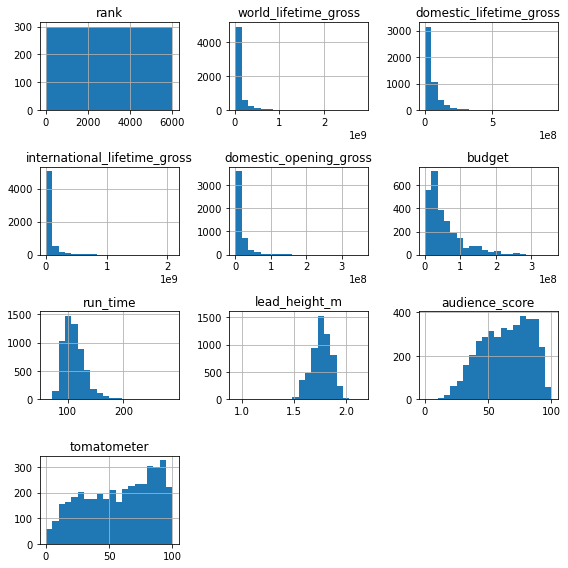

In [5]:
imdb_df.hist(figsize=(8,8), bins=20)
plt.tight_layout();


In [6]:
# list movies that have no domestic gross (i.e., international films)
imdb_df[imdb_df['domestic_lifetime_gross'].isna()].head()


,rank,title,world_lifetime_gross,domestic_lifetime_gross,international_lifetime_gross,studio,domestic_opening_gross,budget,release_date,MPAA_rating,run_time,genre_list,lead_name,lead_birth_date,lead_height_m,lead_is_female,audience_score,tomatometer
83,84,"Hi, Mom",822054381,NaN,822054381,NaN,NaN,NaN,2021-02-12,NaN,128.0,Comedy Drama Fantasy,Ling Jia,NaN,NaN,True,56.0,73.0
128,129,Detective Chinatown 3,686257563,NaN,686257563,Warner Bros.,NaN,NaN,2021-02-12,R,136.0,Action Adventure Comedy Mystery,Baoqiang Wang,1984-04-29,1.65,False,NaN,NaN
289,290,"My People, My Homeland",422390820,NaN,422390820,NaN,NaN,NaN,2020-10-01,NaN,153.0,Drama,Bo Huang,1974-08-26,1.72,False,NaN,NaN
361,362,Hello Mr. Billionaire,366961907,NaN,366961907,NaN,NaN,NaN,2018-07-27,NaN,118.0,Comedy,Teng Shen,NaN,NaN,False,NaN,NaN
429,430,Never Say Die,334530869,NaN,334530869,NaN,NaN,NaN,2017-09-29,NaN,100.0,Comedy Fantasy Sport,Lun Ai,NaN,1.87,True,43.0,NaN


In [7]:
# for international films with no domestic gross, set nans to 0
imdb_df['domestic_lifetime_gross'] = imdb_df['domestic_lifetime_gross'].fillna(0).astype(int)

# for films with no studio listed, set nans to 'Other'
imdb_df['studio'] = imdb_df['studio'].fillna('Other studio').astype(str)


In [8]:
# calculate ratio of domestic to international gross, use as proxy for domestic vs. international film
imdb_df['domestic_pct_international'] = imdb_df['domestic_lifetime_gross'] / imdb_df['international_lifetime_gross']


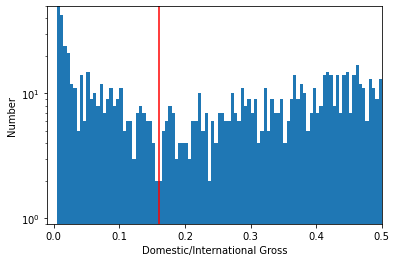

In [9]:
# distribution of ratio of domestic to international gross, use to select cut-off for domestic vs. international
plt.hist(imdb_df['domestic_pct_international'], bins=np.arange(0.005,5.0,0.005))
plt.axvline(0.16, c='r') # limit for domestic (ratio > 0.16) vs. international (ratio < 0.16) film
plt.xlim(-0.01,0.50)
plt.ylim(0.9,50)
plt.yscale('log')
plt.xlabel('Domestic/International Gross')
plt.ylabel('Number');


In [10]:
# list movies that have very low domestic gross (i.e., international films)
imdb_df[imdb_df['domestic_pct_international'] < 0.16].sort_values('domestic_pct_international').head()


,rank,title,world_lifetime_gross,domestic_lifetime_gross,international_lifetime_gross,studio,domestic_opening_gross,budget,release_date,MPAA_rating,run_time,genre_list,lead_name,lead_birth_date,lead_height_m,lead_is_female,audience_score,tomatometer,domestic_pct_international
4164,4165,Tokyo Tower,29249326,0,29249326,Other studio,NaN,NaN,2005-01-15,NaN,125.0,Drama Romance,Hitomi Kuroki,1960-10-05,1.63,True,NaN,NaN,0.0
4668,4669,I Want You,24016152,0,24016152,Other studio,NaN,NaN,2012-06-22,NaN,NaN,Drama Romance,Mario Casas,1986-06-12,1.80,False,65.0,NaN,0.0
4667,4668,Nasha Russia. Yaytsa sudby,24022125,0,24022125,Other studio,NaN,NaN,2010-01-21,NaN,85.0,Comedy,Nikolay Baskov,1976-10-15,NaN,False,NaN,NaN,0.0
4665,4666,Mortadelo & Filemon: The Big Adventure,24035064,0,24035064,Other studio,NaN,NaN,2003-02-07,NaN,107.0,Action Adventure Comedy,Benito Pocino,1958-08-02,NaN,False,NaN,NaN,0.0
4663,4664,I Give My First Love to You,24051386,0,24051386,Other studio,NaN,NaN,2009-10-24,NaN,122.0,Drama Romance,Mao Inoue,1987-01-09,1.57,True,NaN,NaN,0.0


In [11]:
# list movies that have no international gross (i.e., domestic films)
imdb_df[imdb_df['domestic_pct_international'].isin([np.inf, -np.inf])].head()


,rank,title,world_lifetime_gross,domestic_lifetime_gross,international_lifetime_gross,studio,domestic_opening_gross,budget,release_date,MPAA_rating,run_time,genre_list,lead_name,lead_birth_date,lead_height_m,lead_is_female,audience_score,tomatometer,domestic_pct_international
905,906,Snow White and the Seven Dwarfs,184925486,184925486,0,Walt Disney Studios Motion Pictures,NaN,1499000.0,1937-12-21,Approved,83.0,Animation Family Fantasy Musical Romance,Adriana Caselotti,1916-05-06,NaN,True,NaN,NaN,inf
965,966,Tootsie,177200000,177200000,0,Columbia Pictures,5540470.0,21000000.0,1982-12-17,NaN,116.0,Comedy Drama Romance,Dustin Hoffman,1937-08-08,1.67,False,81.0,90.0,inf
1029,1030,Three Men and a Baby,167780960,167780960,0,Walt Disney Studios Motion Pictures,10384392.0,11000000.0,1987-11-25,NaN,102.0,Comedy Drama Family,Tom Selleck,1945-01-29,1.93,False,47.0,76.0,inf
1114,1115,The Sting,156000000,156000000,0,Universal Pictures,NaN,NaN,1973-12-25,NaN,129.0,Comedy Crime Drama,Paul Newman,1925-01-26,1.77,False,NaN,NaN,inf
1216,1217,National Lampoon's Animal House,141600000,141600000,0,Universal Pictures,276538.0,NaN,1978-07-28,NaN,109.0,Comedy,John Belushi,1949-01-24,1.70,False,89.0,90.0,inf


In [12]:
# convert ratio of domestic to international lifetime gross to a bool, small ratios indicate likely an international film
imdb_df['international_movie'] = imdb_df['domestic_pct_international'] < 0.16
imdb_df.drop(['domestic_lifetime_gross', 'international_lifetime_gross', 'domestic_pct_international'], axis=1, inplace=True)


In [13]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    6000 non-null   int64  
 1   title                   6000 non-null   object 
 2   world_lifetime_gross    6000 non-null   int64  
 3   studio                  6000 non-null   object 
 4   domestic_opening_gross  4723 non-null   float64
 5   budget                  2633 non-null   float64
 6   release_date            6000 non-null   object 
 7   MPAA_rating             3873 non-null   object 
 8   run_time                5800 non-null   float64
 9   genre_list              5986 non-null   object 
 10  lead_name               5976 non-null   object 
 11  lead_birth_date         5799 non-null   object 
 12  lead_height_m           5614 non-null   float64
 13  lead_is_female          5975 non-null   object 
 14  audience_score          4093 non-null   

In [14]:
# convert date object to datetime
imdb_df['release_date'] = pd.to_datetime(imdb_df['release_date'], format='%Y-%M-%d')
imdb_df['lead_birth_date'] = pd.to_datetime(imdb_df['lead_birth_date'], format='%Y-%M-%d')


In [15]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rank                    6000 non-null   int64         
 1   title                   6000 non-null   object        
 2   world_lifetime_gross    6000 non-null   int64         
 3   studio                  6000 non-null   object        
 4   domestic_opening_gross  4723 non-null   float64       
 5   budget                  2633 non-null   float64       
 6   release_date            6000 non-null   datetime64[ns]
 7   MPAA_rating             3873 non-null   object        
 8   run_time                5800 non-null   float64       
 9   genre_list              5986 non-null   object        
 10  lead_name               5976 non-null   object        
 11  lead_birth_date         5799 non-null   datetime64[ns]
 12  lead_height_m           5614 non-null   float64 

In [16]:
# calculate age of lead actor at time of film release, convert seconds to years
imdb_df['lead_age_years'] = (imdb_df['release_date'] - imdb_df['lead_birth_date']).dt.total_seconds() / (24.0 * 60.0 * 60.0) / 365.25
imdb_df.drop(['release_date', 'lead_birth_date'], axis=1, inplace=True)


In [17]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    6000 non-null   int64  
 1   title                   6000 non-null   object 
 2   world_lifetime_gross    6000 non-null   int64  
 3   studio                  6000 non-null   object 
 4   domestic_opening_gross  4723 non-null   float64
 5   budget                  2633 non-null   float64
 6   MPAA_rating             3873 non-null   object 
 7   run_time                5800 non-null   float64
 8   genre_list              5986 non-null   object 
 9   lead_name               5976 non-null   object 
 10  lead_height_m           5614 non-null   float64
 11  lead_is_female          5975 non-null   object 
 12  audience_score          4093 non-null   float64
 13  tomatometer             4012 non-null   float64
 14  international_movie     6000 non-null   

In [18]:
# for movies where only one score was obtained, change both scores to nan
# usually if only once score exists, it is because there is a different, older movie with the same name that the scraper found, instead of the top movie
imdb_df.audience_score.where(imdb_df.tomatometer.notnull(), np.nan, inplace=True)
imdb_df.tomatometer.where(imdb_df.audience_score.notnull(), np.nan, inplace=True)


In [19]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    6000 non-null   int64  
 1   title                   6000 non-null   object 
 2   world_lifetime_gross    6000 non-null   int64  
 3   studio                  6000 non-null   object 
 4   domestic_opening_gross  4723 non-null   float64
 5   budget                  2633 non-null   float64
 6   MPAA_rating             3873 non-null   object 
 7   run_time                5800 non-null   float64
 8   genre_list              5986 non-null   object 
 9   lead_name               5976 non-null   object 
 10  lead_height_m           5614 non-null   float64
 11  lead_is_female          5975 non-null   object 
 12  audience_score          4008 non-null   float64
 13  tomatometer             4008 non-null   float64
 14  international_movie     6000 non-null   

In [20]:
# drop rows with nan domestic opening, budget, audience score, tomatometer, or lead age
imdb_df.dropna(subset=['domestic_opening_gross', 'budget', 'run_time', 'audience_score', 'tomatometer', 'lead_age_years'], inplace=True)
imdb_df.reset_index(drop=True)


,rank,title,world_lifetime_gross,studio,domestic_opening_gross,budget,MPAA_rating,run_time,genre_list,lead_name,lead_height_m,lead_is_female,audience_score,tomatometer,international_movie,lead_age_years
0,1,Avatar,2847246203,Twentieth Century Fox,77025481.0,237000000.0,PG-13,162.0,Action Adventure Fantasy Sci-Fi,Sam Worthington,1.78,False,82.0,82.0,False,33.040391
1,2,Avengers: Endgame,2797501328,Walt Disney Studios Motion Pictures,357115007.0,356000000.0,PG-13,181.0,Action Adventure Drama Sci-Fi,Robert Downey Jr.,1.74,False,90.0,94.0,False,54.053388
2,3,Titanic,2201647264,Paramount Pictures,28638131.0,200000000.0,PG-13,194.0,Drama Romance,Leonardo DiCaprio,1.83,False,69.0,89.0,False,23.022589
3,4,Star Wars: Episode VII - The Force Awakens,2069521700,Walt Disney Studios Motion Pictures,247966675.0,245000000.0,PG-13,138.0,Action Adventure Sci-Fi,Daisy Ridley,1.70,True,85.0,93.0,False,23.017127
4,6,Jurassic World,1670516444,Universal Pictures,208806270.0,150000000.0,PG-13,124.0,Action Adventure Sci-Fi,Chris Pratt,1.88,False,78.0,71.0,False,35.969884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5965,Drowning Mona,15910104,Destination Films,5802229.0,37000000.0,PG-13,96.0,Comedy Crime Mystery,Danny DeVito,1.47,False,46.0,29.0,False,55.961655
1996,5975,The Last Kiss,15852401,DreamWorks,4627989.0,20000000.0,R,115.0,Comedy Drama Romance,Zach Braff,1.82,False,79.0,73.0,False,31.025335
1997,5977,Highlander: Endgame,15843608,Miramax,5067331.0,25000000.0,R,87.0,Action Adventure Fantasy Sci-Fi,Christopher Lambert,1.78,False,38.0,11.0,False,42.921298
1998,5986,Kiss Kiss Bang Bang,15785148,Warner Bros.,180660.0,15000000.0,R,103.0,Comedy Crime Mystery Thriller,Robert Downey Jr.,1.74,False,87.0,86.0,False,40.027388


In [21]:
# dataset is relatively unbalanced in the lead actor gender
print('Number of movies with male leads:', sum(imdb_df['lead_is_female'] == False), '(~{:.1f}%)'.format(100.0*sum(imdb_df['lead_is_female'] == False)/len(imdb_df)))
print('Number of movies with female leads:', sum(imdb_df['lead_is_female'] == True), '(~{:.1f}%)'.format(100.0*sum(imdb_df['lead_is_female'] == True)/len(imdb_df)))


Number of movies with male leads: 1399 (~70.0%)
Number of movies with female leads: 601 (~30.1%)


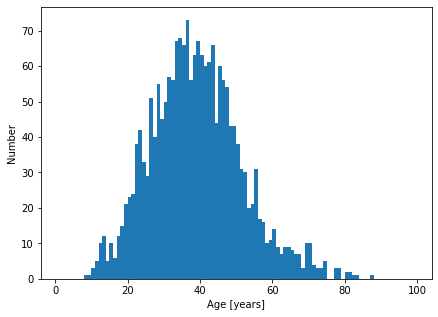

In [22]:
# distribution of lead actor ages
plt.figure(figsize=(7,5))
plt.hist(imdb_df['lead_age_years'], bins=np.arange(1,100,1))
plt.xlabel('Age [years]')
plt.ylabel('Number');


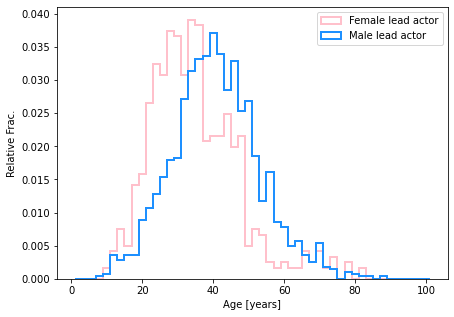

In [23]:
# distribution of lead actor ages, subset by gender of lead actor
plt.figure(figsize=(7,5))
plt.hist(imdb_df['lead_age_years'][imdb_df['lead_is_female'] == True], bins=np.arange(1,102,2), 
         histtype='step', color='pink', lw=2, density=True,
         label='Female lead actor')
plt.hist(imdb_df['lead_age_years'][imdb_df['lead_is_female'] == False], bins=np.arange(1,102,2), 
         histtype='step', color='dodgerblue', lw=2, density=True,
         label='Male lead actor')
plt.legend()
plt.xlabel('Age [years]')
plt.ylabel('Relative Frac.');


In [24]:
imdb_df.describe()

,rank,world_lifetime_gross,domestic_opening_gross,budget,run_time,lead_height_m,audience_score,tomatometer,lead_age_years
count,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,1983.000000,2000.000000,2000.000000,2000.000000
mean,2032.516000,1.852508e+08,2.199354e+07,5.528718e+07,110.920500,1.765078,62.387500,54.417000,39.064448
std,1544.520726,2.436656e+08,2.678598e+07,4.994770e+07,19.159664,0.093697,19.119444,27.018199,12.600198
min,1.000000,1.577946e+07,4.775000e+03,1.500000e+04,63.000000,1.470000,12.000000,0.000000,8.024662
25%,750.750000,4.705344e+07,7.601043e+06,2.000000e+07,97.000000,1.700000,48.000000,30.000000,30.030796
50%,1710.500000,9.830288e+07,1.402681e+07,4.000000e+07,107.000000,1.770000,63.000000,56.000000,38.039711
75%,3009.250000,2.165145e+08,2.564401e+07,7.500000e+07,122.000000,1.830000,79.000000,78.000000,46.967820
max,5990.000000,2.847246e+09,3.571150e+08,3.560000e+08,201.000000,2.050000,99.000000,100.000000,87.953470


In [25]:
studio_counts = imdb_df['studio'].value_counts()
studio_counts

Warner Bros.                         306
Universal Pictures                   252
Twentieth Century Fox                207
Sony Pictures Entertainment (SPE)    176
Paramount Pictures                   167
                                    ... 
20th Century Studios                   1
Pantelion Films                        1
Music Box Films                        1
Yari Film Group Releasing              1
FUNimation Entertainment               1
Name: studio, Length: 69, dtype: int64

In [26]:
# rename studios to 'Other' if they have produced very few films
other_studio = list(studio_counts[studio_counts < 20].index)

imdb_df['studio'] = imdb_df['studio'].replace(other_studio, 'Other studio')

imdb_df['studio'].value_counts()


Warner Bros.                           306
Universal Pictures                     252
Other studio                           242
Twentieth Century Fox                  207
Sony Pictures Entertainment (SPE)      176
Paramount Pictures                     167
Walt Disney Studios Motion Pictures    157
Lionsgate                              104
New Line Cinema                         67
Screen Gems                             51
Miramax                                 40
Focus Features                          36
Fox Searchlight Pictures                35
Metro-Goldwyn-Mayer (MGM)               34
DreamWorks Distribution                 29
TriStar Pictures                        28
DreamWorks                              25
STX Entertainment                       24
The Weinstein Company                   20
Name: studio, dtype: int64

In [27]:
# change 'NC-17' rating to 'R' since very few movies have that rating, and it is roughly equivalent to an R rating
imdb_df['MPAA_rating'] = imdb_df['MPAA_rating'].replace('NC-17', 'R')


In [28]:
# write cleaned data to new file
imdb_df.to_csv('top_gross_films_clean.csv')